14536120/14536120 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Saving images-12-_jpeg.rf.e79dcf13e5ebc6419d36eb212c2277f0.jpg to images-12-_jpeg.rf.e79dcf13e5ebc6419d36eb212c2277f0.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


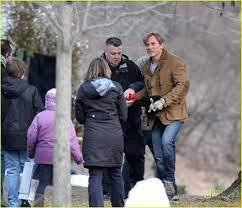

In [1]:
# Animal Detection Model - Colab Notebook

# Install required libraries
!pip install opencv-python numpy tensorflow keras matplotlib

import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from google.colab import files

# Load a pre-trained model or define a new CNN model
model = keras.applications.MobileNetV2(weights='imagenet')

# Function to preprocess image for model input
def preprocess_image(image_path):
    img = keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = keras.applications.mobilenet_v2.preprocess_input(img_array)
    return img_array

# Function to classify image
def classify_image(image_path):
    img_array = preprocess_image(image_path)
    predictions = model.predict(img_array)
    decoded_predictions = keras.applications.mobilenet_v2.decode_predictions(predictions, top=3)[0]
    return decoded_predictions

# Function to highlight carnivorous animals
def highlight_carnivores(image_path, predictions):
    img = cv2.imread(image_path)
    for pred in predictions:
        label, confidence = pred[1], pred[2]
        if label in ['lion', 'tiger', 'wolf', 'fox', 'bear']:  # Define carnivorous animals
            cv2.putText(img, f"{label} ({confidence:.2f})", (50, 50),
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)
    cv2_imshow(img)

# Upload an image and classify
uploaded = files.upload()
image_path = list(uploaded.keys())[0]
predictions = classify_image(image_path)
highlight_carnivores(image_path, predictions)

# Display pop-up message for detected carnivores
carnivores_detected = sum(1 for pred in predictions if pred[1] in ['lion', 'tiger', 'wolf', 'fox', 'bear'])
if carnivores_detected > 0:
    print(f"Warning! {carnivores_detected} carnivorous animal(s) detected.")
